In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Import the data 

In [3]:
train = pd.read_csv("train.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Look for NA values

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Remove the Embarked NA values from the dataset
train = train[train['Embarked'].notnull()]

In [6]:
#Replacing the NA values of Age with the previous row value
train['Age'].fillna(method ='ffill', limit = 1, inplace = True)
train['Age'].fillna(method ='ffill', limit = 1, inplace = True)
train['Age'].fillna(method ='ffill', limit = 1, inplace = True)
train['Age'].fillna(method ='ffill', limit = 1, inplace = True)

In [7]:
#Given the total data points missing I'll remove the entire column
del train['Cabin']

Now we can see that there is no NA values in the columns of the dataset

In [8]:
del train['PassengerId']

In [9]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Data Visualization

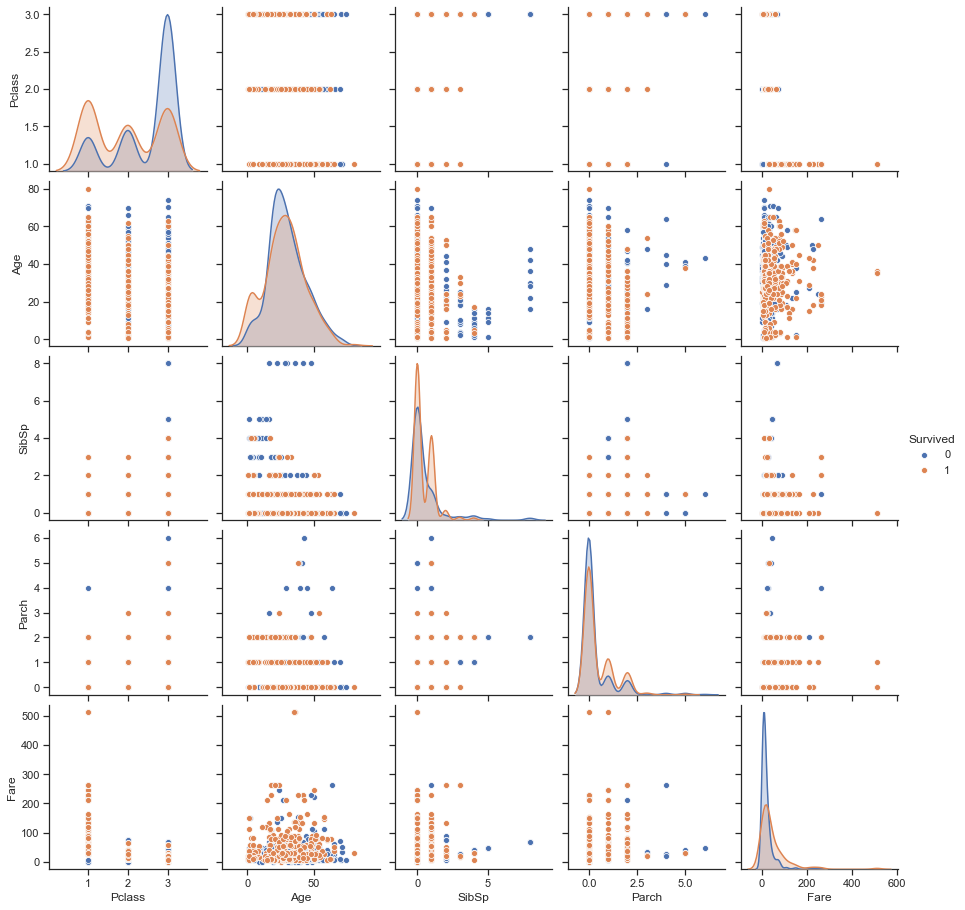

In [10]:
sns.set(style="ticks")
sns.pairplot(train, hue="Survived")

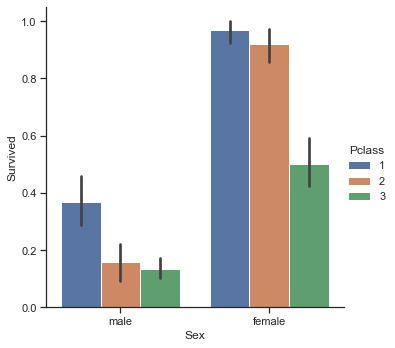

In [11]:
sns.catplot(x = "Sex", 
            y = "Survived", 
            data = train, 
            kind = 'bar', 
            hue= 'Pclass')

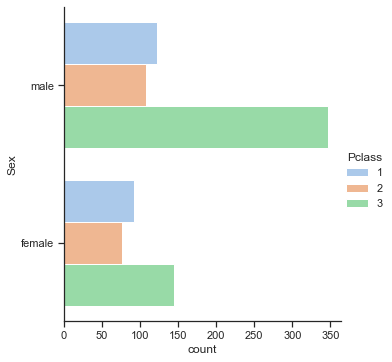

In [12]:
sns.catplot(y="Sex", hue="Pclass", 
            kind="count",
            palette="pastel",
            data=train)

### Machine Learning models

In [13]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [14]:
del train['Name']
del train['Ticket']

In [15]:
train = pd.get_dummies(train)
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20)

#### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy: 0.69


#### Linear Model

In [17]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression()
linear.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(linear.score(X_test, y_test)))

Accuracy: 0.81


#### Naive Bayes

In [18]:
from sklearn.naive_bayes import  GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(nb.score(X_test, y_test)))

Accuracy: 0.82


#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy: 0.75


#### SVM

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C= 30)
svm.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy: 0.79


#### Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=5)
neural.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(neural.score(X_test, y_test)))

Accuracy: 0.81


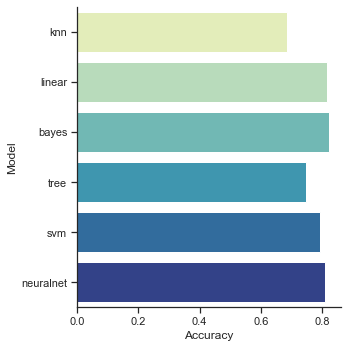

In [23]:
accuracy = {'Model':['knn','linear','bayes', 'tree', 'svm','neuralnet'],
            'Accuracy':[knn.score(X_test, y_test),
            linear.score(X_test, y_test),
            nb.score(X_test, y_test),
            tree.score(X_test, y_test),
            svm.score(X_test, y_test),
            neural.score(X_test, y_test)]}
accuracy = pd.DataFrame(accuracy, columns = ['Model', 'Accuracy'])
sns.catplot(y='Model', x ='Accuracy', data = accuracy, kind='bar', palette="YlGnBu")